# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
!pip install palmerpenguins

In [7]:
import pandas as pd
import numpy
from palmerpenguins import load_penguins
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [8]:
penguins = load_penguins()
penguins = penguins.dropna()

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [9]:
# Code Here
X = penguins.drop(['species'], axis = 1)
y = penguins['species']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25)

log = LogisticRegression()
enc = OneHotEncoder(sparse_output=False)
ct = ColumnTransformer([
                       ('dummify_i', enc, ['island']),
                       ('dummify_x', enc, ['sex'])]
, remainder = 'passthrough').set_output(transform = 'pandas')

Knn1 = Pipeline(
    [('dummify_everything', ct),('KNN', KNeighborsClassifier(5))]
)


In [10]:
from sklearn.preprocessing import label_binarize
fitKn1 = Knn1.fit(X,y)
y_test_preds = fitKn1.predict(X_test)
y_test_probs = Knn1.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=['Adelie', 'Chinstrap', 'Gentoo'])

In [11]:
y_test_bin

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0,

In [12]:
cm1 = confusion_matrix(y_test_preds, y_test)
cm1

array([[26,  8,  2],
       [ 2, 12,  0],
       [ 2,  0, 32]], dtype=int64)

In [13]:
accuracy_score(y_test_preds, y_test)

0.8333333333333334

In [14]:
precision_score(y_test_preds, y_test, average = None)

array([0.86666667, 0.6       , 0.94117647])

In [15]:
recall_score(y_test_preds, y_test, average = None)

array([0.72222222, 0.85714286, 0.94117647])

In [16]:
f1_score(y_test_preds, y_test, average = None)

array([0.78787879, 0.70588235, 0.94117647])

In [17]:
roc_auc_score(y_test_bin,y_test_probs, average = None)

array([0.94475309, 0.9578125 , 0.99558824])

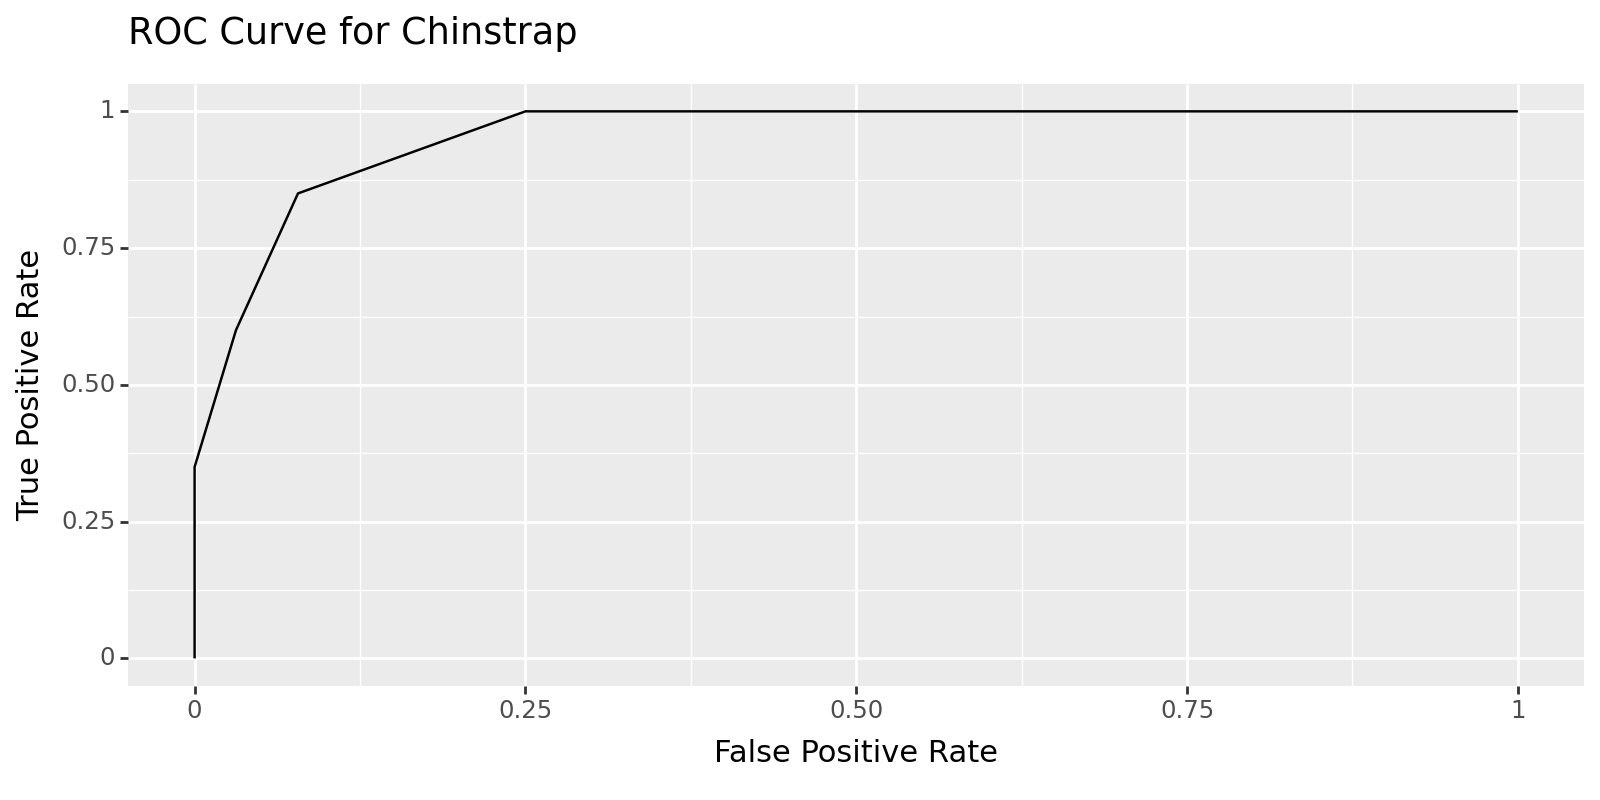

<Figure Size: (800 x 400)>

In [18]:
#ROC CURVE
fpr, tpr, thresholds = roc_curve(y_test_bin[:,1], y_test_probs[:,1], pos_label=1)
rc1 = pd.DataFrame({"fpr": fpr, "tpr": tpr, "threshold": thresholds})
from plotnine import *
(
    ggplot(rc1)
    + aes(x='fpr', y = 'tpr')
    + geom_line()
    + labs(x='False Positive Rate', y = "True Positive Rate", title = "ROC Curve for Chinstrap")
    + theme(figure_size=(8, 4))
)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25)

log = LogisticRegression()
enc = OneHotEncoder(sparse_output=False)
ct = ColumnTransformer([
                       ('dummify_i', enc, ['island']),
                       ('dummify_x', enc, ['sex'])]
, remainder = 'passthrough').set_output(transform = 'pandas')

Knn2 = Pipeline(
    [('dummify_everything', ct),('KNN', KNeighborsClassifier(15))]
)


In [20]:
fitKn2 = Knn2.fit(X,y)
y_test_preds2 = fitKn2.predict(X_test)
y_test_probs2 = fitKn2.predict_proba(X_test)


In [21]:
print(f"Confusion Matrix:\n {confusion_matrix(y_test_preds2, y_test)}")
print(f"Accuracy Score: {accuracy_score(y_test_preds2, y_test)}")
print(f"Precision Score: {precision_score(y_test_preds2, y_test, average = None)}")
print(f"Recall Score: {recall_score(y_test_preds2, y_test, average = None)}")
print(f"F1 Score: {f1_score(y_test_preds2, y_test, average = None)}")
print(f"ROC AUC Score: {roc_auc_score(y_test_bin,y_test_probs2, average = None)}")

Confusion Matrix:
 [[33 12  2]
 [ 0  6  0]
 [ 4  0 27]]
Accuracy Score: 0.7857142857142857
Precision Score: [0.89189189 0.33333333 0.93103448]
Recall Score: [0.70212766 1.         0.87096774]
F1 Score: [0.78571429 0.5        0.9       ]
ROC AUC Score: [0.48858025 0.58867187 0.52470588]


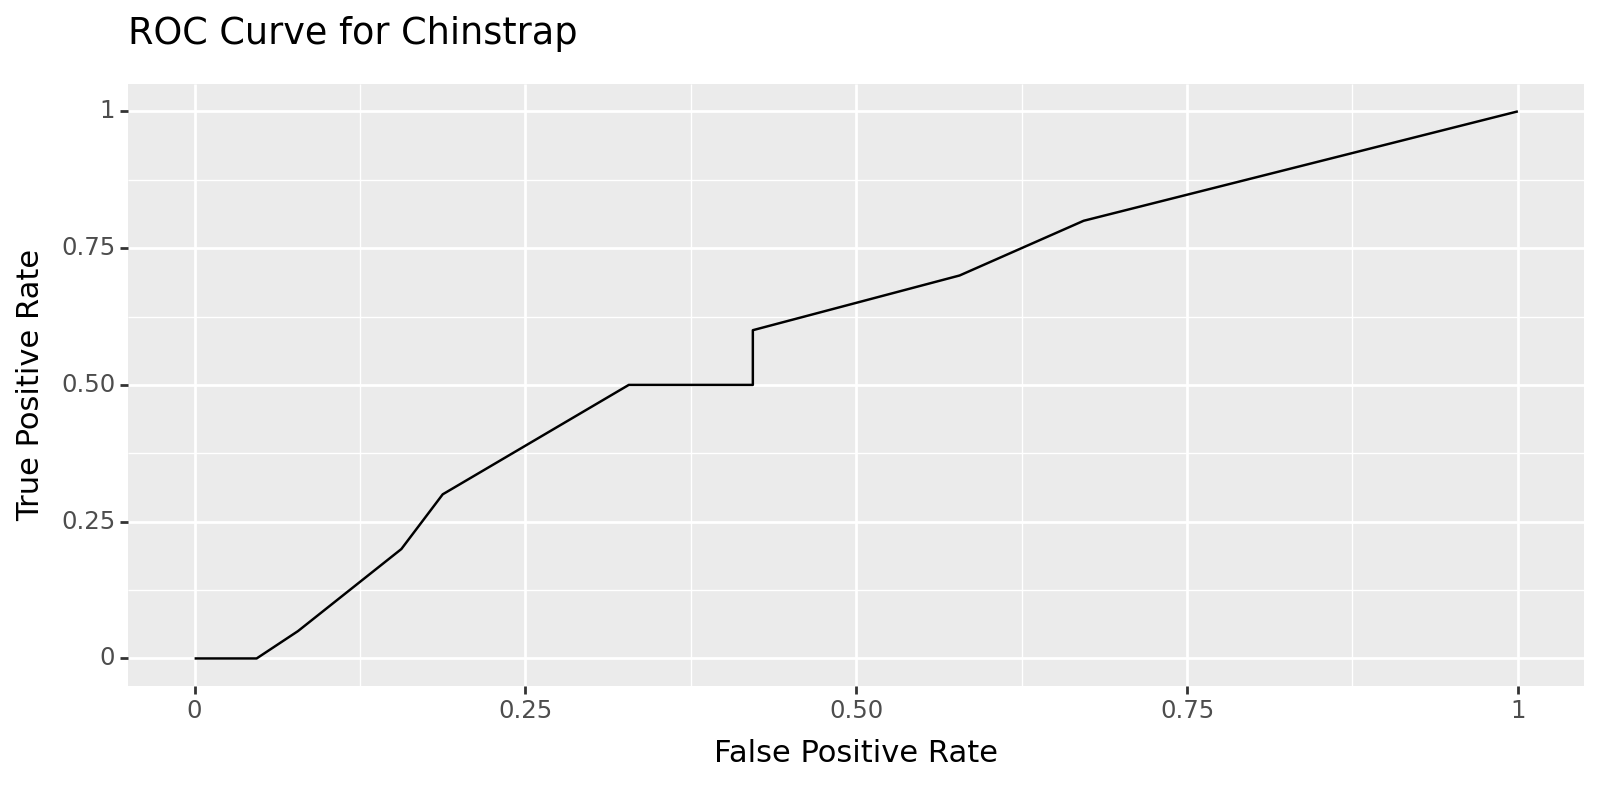

<Figure Size: (800 x 400)>

In [22]:
#ROC CURVE
fpr, tpr, thresholds = roc_curve(y_test_bin[:,1], y_test_probs2[:,1], pos_label=1)
rc2 = pd.DataFrame({"fpr": fpr, "tpr": tpr, "threshold": thresholds})
from plotnine import *
(
    ggplot(rc2)
    + aes(x='fpr', y = 'tpr')
    + geom_line()
    + labs(x='False Positive Rate', y = "True Positive Rate", title = "ROC Curve for Chinstrap")
    + theme(figure_size=(8, 4))
)

In [23]:
log = LogisticRegression()
enc = OneHotEncoder(sparse_output=False)
ct = ColumnTransformer([
                       ('dummify_i', enc, ['island']),
                       ('dummify_x', enc, ['sex'])]
, remainder = 'passthrough').set_output(transform = 'pandas')

DT1 = Pipeline(
    [('dummify_everything', ct),('DT1', DecisionTreeClassifier(max_depth = 5))]
)


In [24]:
fitDT1 = DT1.fit(X,y)
y_test_preds3 = fitDT1.predict(X_test)
y_test_probs3 = fitDT1.predict_proba(X_test)

In [25]:
print(f"Confusion Matrix:\n {confusion_matrix(y_test_preds3, y_test)}")
print(f"Accuracy Score: {accuracy_score(y_test_preds3, y_test)}")
print(f"Precision Score: {precision_score(y_test_preds3, y_test, average = None)}")
print(f"Recall Score: {recall_score(y_test_preds3, y_test, average = None)}")
print(f"F1 Score: {f1_score(y_test_preds3, y_test, average = None)}")
print(f"ROC AUC Score: {roc_auc_score(y_test_bin,y_test_probs3, average = None)}")

Confusion Matrix:
 [[37  0  0]
 [ 0 18  0]
 [ 0  0 29]]
Accuracy Score: 1.0
Precision Score: [1. 1. 1.]
Recall Score: [1. 1. 1.]
F1 Score: [1. 1. 1.]
ROC AUC Score: [0.5462963  0.5890625  0.55588235]


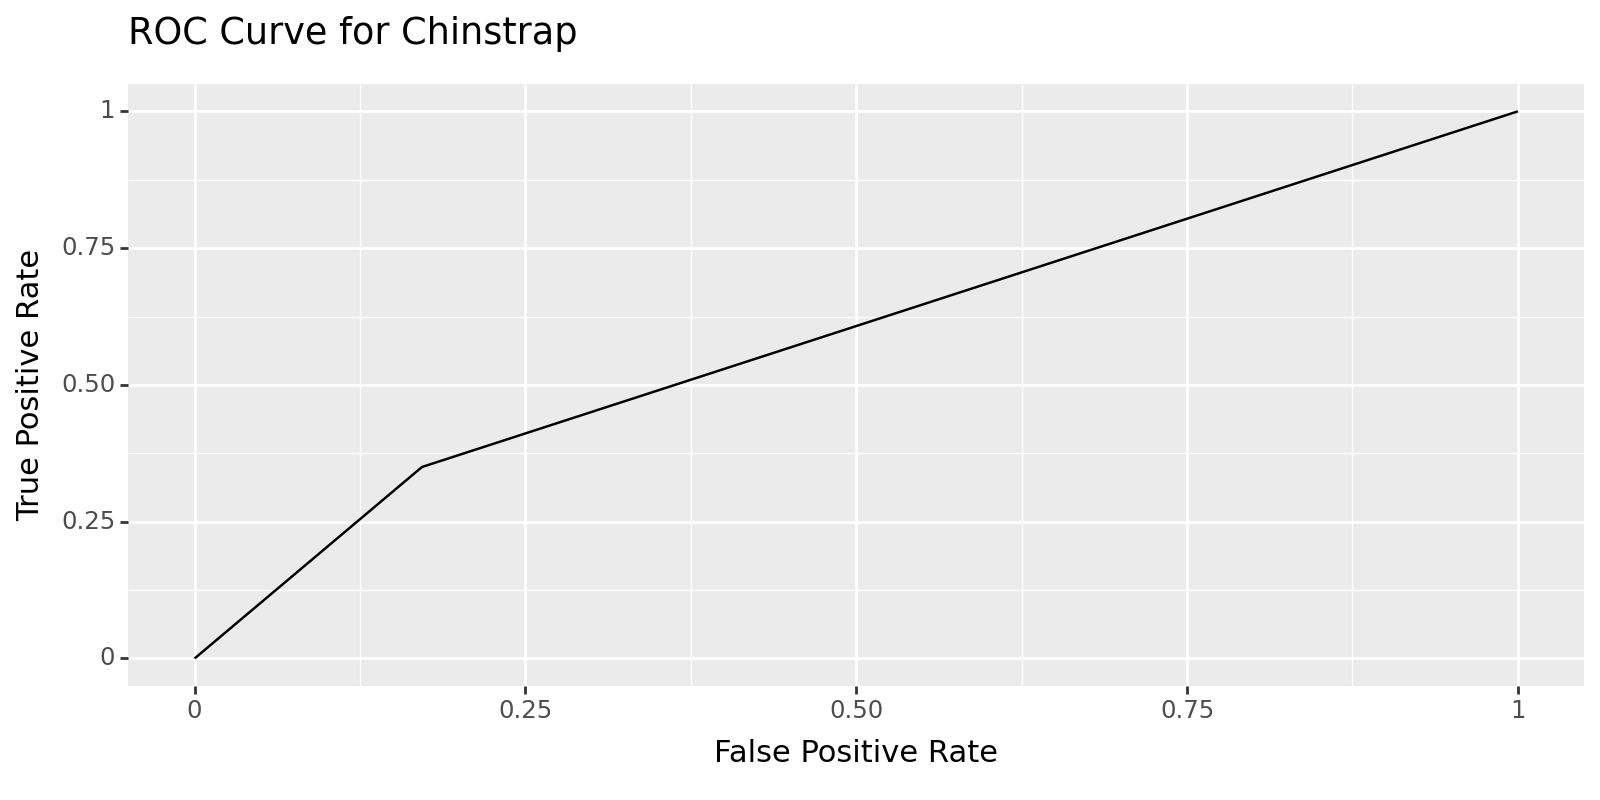

<Figure Size: (800 x 400)>

In [26]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_bin[:,1], y_test_probs3[:,1], pos_label=1)
rc3 = pd.DataFrame({"fpr": fpr, "tpr": tpr, "threshold": thresholds})
from plotnine import *
(
    ggplot(rc3)
    + aes(x='fpr', y = 'tpr')
    + geom_line()
    + labs(x='False Positive Rate', y = "True Positive Rate", title = "ROC Curve for Chinstrap")
    + theme(figure_size=(8, 4))
)

In [27]:
log = LogisticRegression()
enc = OneHotEncoder(sparse_output=False)
ct = ColumnTransformer([
                       ('dummify_i', enc, ['island']),
                       ('dummify_x', enc, ['sex'])]
, remainder = 'passthrough').set_output(transform = 'pandas')

DT2 = Pipeline(
    [('dummify_everything', ct),('DT1', DecisionTreeClassifier(max_depth = 3))]
)

In [28]:
fitDT2 = DT2.fit(X,y)
y_test_preds4 = fitDT2.predict(X_test)
y_test_probs4 = fitDT2.predict_proba(X_test)

In [29]:
print(f"Confusion Matrix:\n {confusion_matrix(y_test_preds4, y_test)}")
print(f"Accuracy Score: {accuracy_score(y_test_preds4, y_test)}")
print(f"Precision Score: {precision_score(y_test_preds4, y_test, average = None)}")
print(f"Recall Score: {recall_score(y_test_preds4, y_test, average = None)}")
print(f"F1 Score: {f1_score(y_test_preds4, y_test, average = None)}")
print(f"ROC AUC Score: {roc_auc_score(y_test_bin,y_test_probs4, average = None)}")

Confusion Matrix:
 [[37  0  0]
 [ 0 18  0]
 [ 0  0 29]]
Accuracy Score: 1.0
Precision Score: [1. 1. 1.]
Recall Score: [1. 1. 1.]
F1 Score: [1. 1. 1.]
ROC AUC Score: [0.52932099 0.59414062 0.55      ]


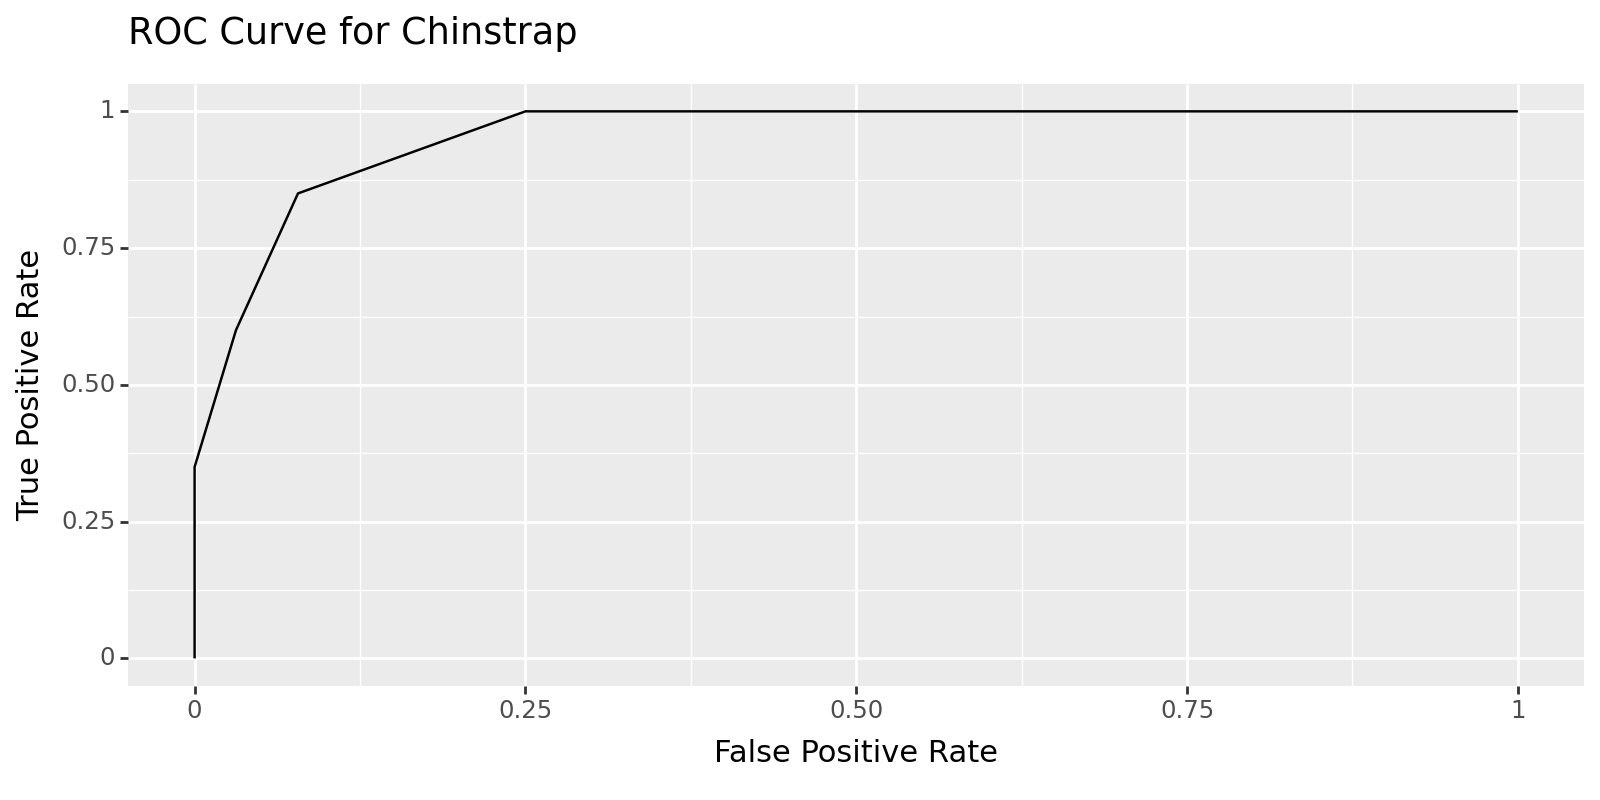

<Figure Size: (800 x 400)>

In [30]:
#ROC CURVE
fpr, tpr, thresholds = roc_curve(y_test_bin[:,1], y_test_probs[:,1], pos_label=1)
rc4 = pd.DataFrame({"fpr": fpr, "tpr": tpr, "threshold": thresholds})
from plotnine import *
(
    ggplot(rc4)
    + aes(x='fpr', y = 'tpr')
    + geom_line()
    + labs(x='False Positive Rate', y = "True Positive Rate", title = "ROC Curve for Chinstrap")
    + theme(figure_size=(8, 4))
)

In [36]:
ct.fit_transform(X).columns

[Index(['dummify_i__island_Biscoe', 'dummify_i__island_Dream',
        'dummify_i__island_Torgersen', 'dummify_x__sex_female',
        'dummify_x__sex_male', 'remainder__bill_length_mm',
        'remainder__bill_depth_mm', 'remainder__flipper_length_mm',
        'remainder__body_mass_g', 'remainder__year'],
       dtype='object')]

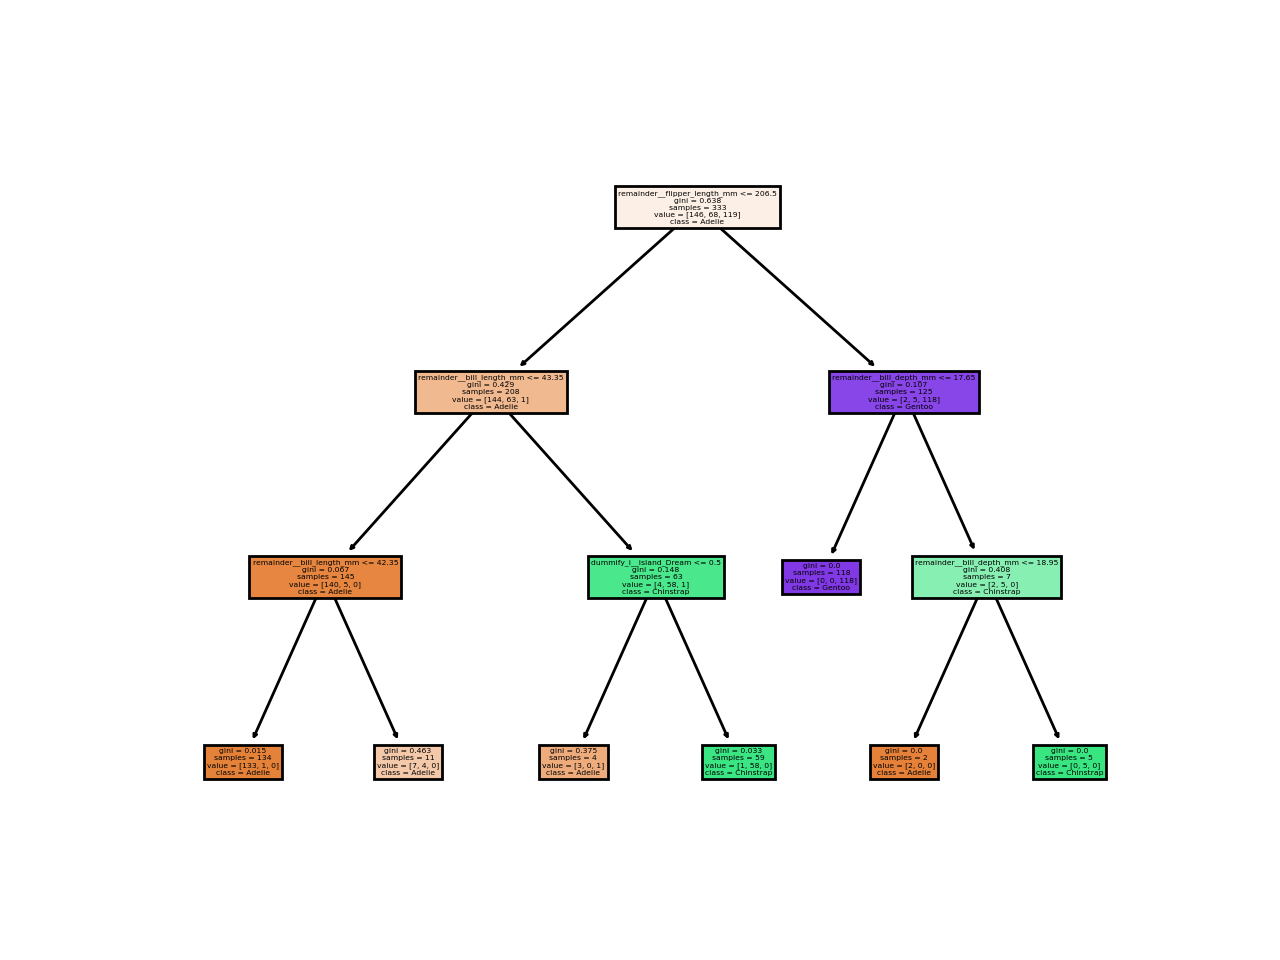

In [48]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plot_tree(DT2.named_steps['DT1'], feature_names=ct.fit_transform(X).columns.to_list(), class_names=['Adelie','Chinstrap', 'Gentoo'], filled=True)
plt.show()